In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error


In [2]:
data = pd.read_csv('Salaries.csv')


In [3]:
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [6]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [8]:
data.shape

(397, 6)

In [9]:
data.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [10]:
data.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [11]:
data.sample()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
47,Prof,B,23,19,Female,151768


In [12]:
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [13]:
data.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [45]:
data.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [47]:
data.iloc[:,0]

0          Prof
1          Prof
2      AsstProf
3          Prof
4          Prof
         ...   
392        Prof
393        Prof
394        Prof
395        Prof
396    AsstProf
Name: rank, Length: 397, dtype: object

In [14]:
data=pd.DataFrame(data=data)
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


<AxesSubplot:>

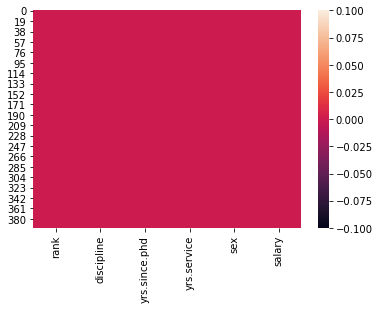

In [15]:
sns.heatmap(data.isnull())

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

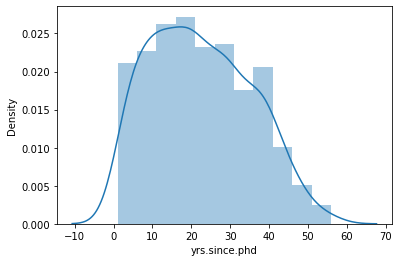

In [16]:
sns.distplot(data['yrs.since.phd'])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

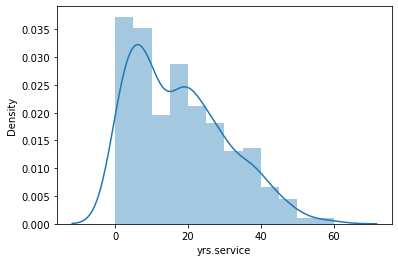

In [17]:
sns.distplot(data['yrs.service'])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

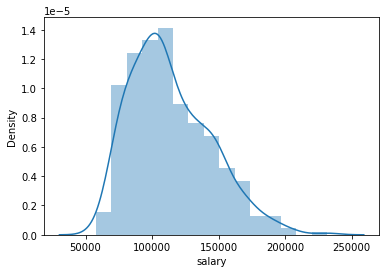

In [18]:
sns.distplot(data['salary'])

In [19]:
data.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:>

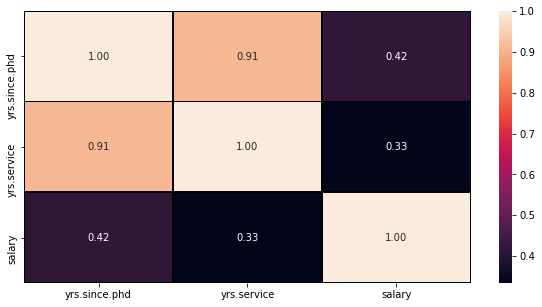

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

In [21]:
data.iloc[:,0]

0          Prof
1          Prof
2      AsstProf
3          Prof
4          Prof
         ...   
392        Prof
393        Prof
394        Prof
395        Prof
396    AsstProf
Name: rank, Length: 397, dtype: object

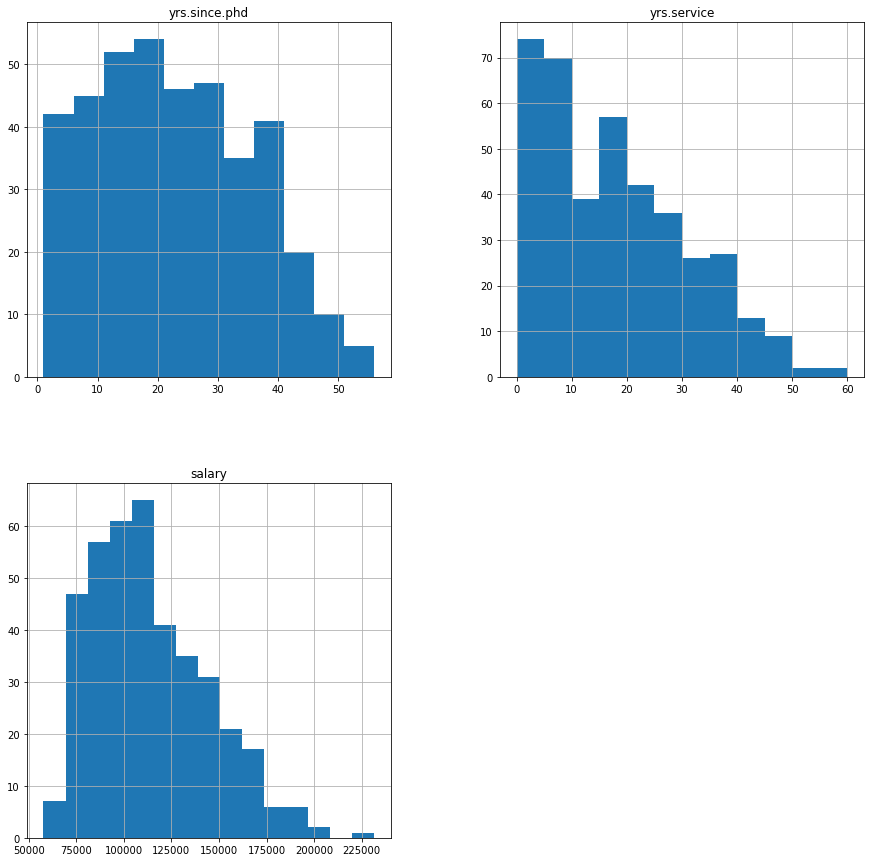

In [22]:
data.hist(bins='auto', figsize=(15,15));

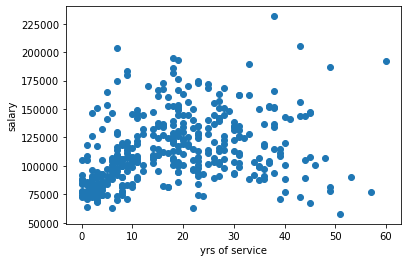

In [23]:
plt.scatter(data['yrs.service'],data['salary'])
plt.xlabel('yrs of service')
plt.ylabel('salary')
plt.show()


In [24]:
x = data.drop('salary',axis=1)
y = data['salary']

In [25]:
x.shape

(397, 5)

In [26]:
y.shape


(397,)

In [27]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [28]:
x

array([['Prof', 'B', 19, 18, 'Male'],
       ['Prof', 'B', 20, 16, 'Male'],
       ['AsstProf', 'B', 4, 3, 'Male'],
       ...,
       ['Prof', 'A', 42, 25, 'Male'],
       ['Prof', 'A', 25, 15, 'Male'],
       ['AsstProf', 'A', 8, 4, 'Male']], dtype=object)

In [29]:
y

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=101,test_size=0.2)

In [31]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((317, 5), (80, 5), (317,), (80,))

In [32]:
y_test

array(['B', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'A',
       'B', 'A', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'B',
       'A', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'B',
       'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'B', 'A',
       'B', 'A', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B',
       'B', 'A'], dtype=object)

In [33]:
sc=StandardScaler()

In [34]:
x=data[['rank','discipline','yrs.since.phd','yrs.service','sex']]

In [35]:
y = data['salary']

In [36]:
y.value_counts()

92000     5
72500     4
74000     4
101000    3
105000    3
         ..
107986    1
166024    1
102580    1
82099     1
121200    1
Name: salary, Length: 371, dtype: int64

In [37]:
x_train, x_test, y_train,x_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [38]:
print("Train data shape: {}".format(x_train.shape))
print("Test data shape: {}".format(x_test.shape))

Train data shape: (317, 5)
Test data shape: (80,)


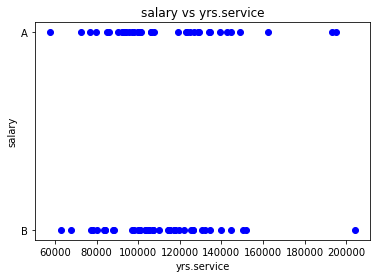

In [39]:
plt.scatter(x_test , y_test,color='blue')
plt.title('salary vs yrs.service')
plt.xlabel('yrs.service')
plt.ylabel("salary")
plt.show()

In [49]:
x=data[['yrs.since.phd','rank','yrs.service','sex','discipline']]
y=data['salary']

In [50]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [54]:
x_train.shape

(317, 5)

In [55]:
y_train.shape

(317,)